In [1]:
from symbulate import *
%matplotlib inline

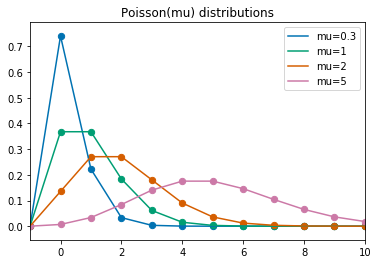

In [2]:
from matplotlib import pyplot as plt
plt.xlim(-1, 10)
Poisson(0.3).plot()
Poisson(1).plot()
Poisson(2).plot()
Poisson(5).plot()
plt.title('Poisson(mu) distributions')
plt.legend(['mu=0.3', 'mu=1', 'mu=2', 'mu=5']);

## Exer 18.2

0,0.7446
1,0.219
2,0.0323
3,0.0039
4,0.0002
Total,1.0


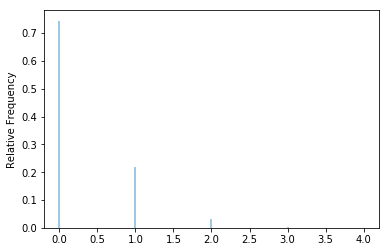

In [3]:
X = RV(Poisson(0.3))
x = X.sim(10000)
x.plot()
x.tabulate(normalize=True)

In [4]:
x.mean(), x.var(), x.sd()

(0.2961, 0.29882478999999995, 0.5466486897450683)

In [5]:
x = [0, 1, 2, 3]
Poisson(lam=0.3).pdf(x)

array([ 0.74081822,  0.22224547,  0.03333682,  0.00333368])

In [6]:
1 - Poisson(lam=0.3).cdf(3)

0.00026581119002178077

## Exer 18.3

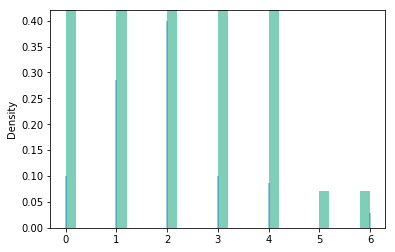

In [7]:
X1, X2 = RV(Poisson(1) * Poisson(1))
X = X1 + X2
X.sim(70).plot()

Y = RV(Poisson(2))
Y.sim(70).plot(jitter=True)

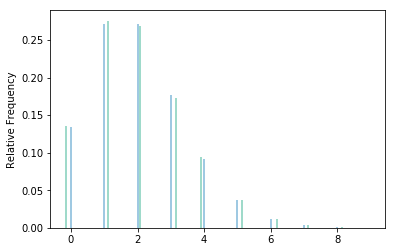

In [8]:
X1, X2 = RV(Poisson(1) * Poisson(1))
X = X1 + X2
X.sim(10000).plot()

Y = RV(Poisson(2))
Y.sim(10000).plot(jitter=True)

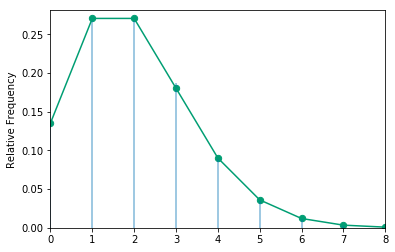

In [9]:
X1, X2 = RV(Poisson(1) * Poisson(1))
X = X1 + X2
X.sim(10000).plot()
Poisson(2).plot()

In [10]:
Poisson(1).pdf([0, 1, 2, 3, 4])

array([ 0.36787944,  0.36787944,  0.18393972,  0.06131324,  0.01532831])

## Exer 18.6

(0.5, 0.38333333333333336)

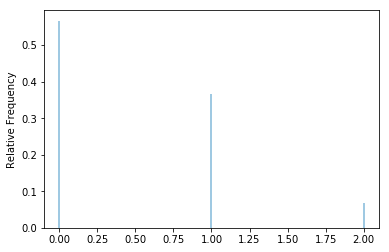

In [11]:
X, Y = RV(Poisson(1) * Poisson(2))
x_given_sum = (X | (X + Y == 2) ).sim(30)
x_given_sum.plot()
x_given_sum.mean(), x_given_sum.var()

(0.6534, 0.43806844)

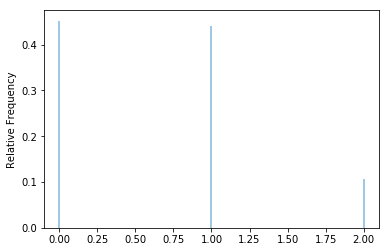

In [12]:
X, Y = RV(Poisson(1) * Poisson(2))
x_given_sum = (X | (X + Y == 2) ).sim(10000)
x_given_sum.plot()
x_given_sum.mean(), x_given_sum.var()

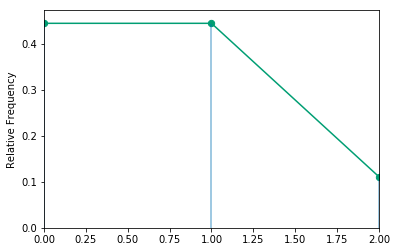

In [13]:
X, Y = RV(Poisson(1) * Poisson(2))
(X | (X + Y == 2) ).sim(10000).plot()
Binomial(n=2, p=1/(1+2)).plot()

In [14]:
Binomial(n=2, p=1/(1+2)).pdf([0, 1, 2])

array([ 0.44444444,  0.44444444,  0.11111111])

## Exer 18.7

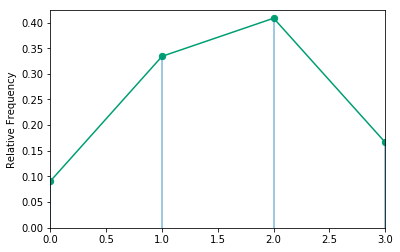

In [19]:
X, Y = RV(Poisson(2.2) * Poisson(1.8))
(X | (X + Y == 3) ).sim(10000).plot()
Binomial(n=3, p=2.2/(2.2+1.8)).plot()

## Exer 18.8

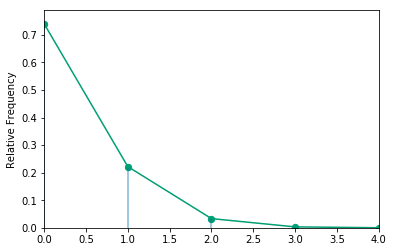

In [16]:
X = RV(Binomial(n=2000, p=0.00015))
X.sim(10000).plot()
Poisson(0.3).plot()

## Exer 18.10

In [17]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets

def matching_sim(n):
    labels = list(range(1, n+1)) # Python syntax for [1, 2, ..., n]
    def number_of_matches(omega):
        count = 0
        for i in range(0, n, 1):
            if omega[i] == labels[i]:
                count += 1
        return count
    
    P = BoxModel(labels, size=n, replace=False, order_matters=True)
    Y = RV(P, number_of_matches)
    y = Y.sim(10000)
    y.plot()
    Poisson(1).plot()
    plt.ylim(0, 0.4)
    plt.xlim(-1, 10.2)
    plt.show()

interact(matching_sim, n=ipywidgets.IntSlider(min=4, max=50, step=1, value=1));

Widget Javascript not detected.  It may not be installed or enabled properly.


## Exer 18.11

0.1857

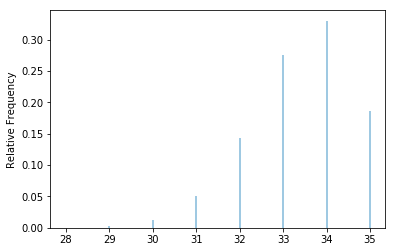

In [18]:
birthdays = 365
n = 35
P = BoxModel(list(range(birthdays)), size=n, replace=True)

# define a function that takes a list of people and counts number of distinct birthdays
def unique_birthdays(omega):
    return len(set(omega))

# define the RV
X = RV(P, unique_birthdays)

x = X.sim(10000)
x.plot()
x.count_eq(n) / 10000 # estimated prob that all birthdays are different